In [1]:
# coding: utf-8
#get_ipython().run_line_magic('matplotlib', 'notebook')
%matplotlib notebook
import json
import serial
import math
import numpy as np
from matplotlib import pyplot as plt
from time import time


In [2]:
ser = serial.Serial('COM7',  baudrate=9600, timeout=0.5)


In [3]:
number=5

flag=np.isnan(number)
flag

False

In [4]:
plt.ion()

In [5]:

start_time = time()
timepoints = []
ydata = []
ydata2 = []
yrange = [-0.1,5.1]
view_time = 10 # seconds of data to view at once
duration = 1000000 # tota



<IPython.core.display.Javascript object>


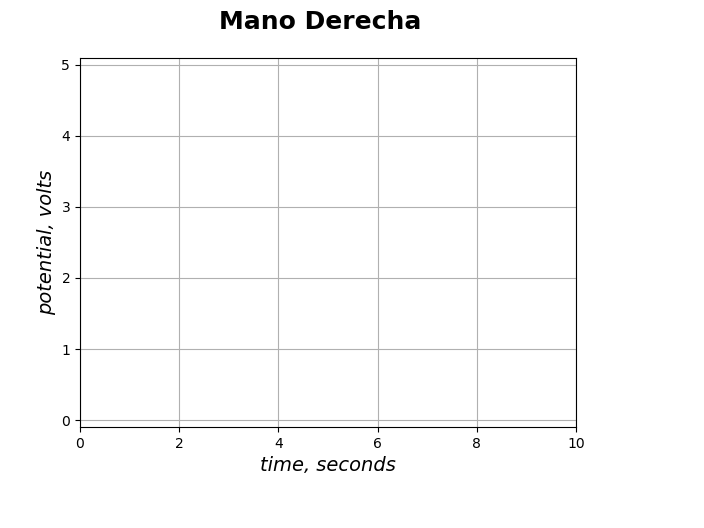

C:\Users\Alejandro C\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


(0, 10)

In [6]:
fig1 = plt.figure()
# http://matplotlib.org/users/text_props.html
fig1.suptitle('Mano Derecha', fontsize='18', fontweight='bold')
plt.xlabel('time, seconds', fontsize='14', fontstyle='italic')
plt.ylabel('potential, volts', fontsize='14', fontstyle='italic')
plt.axes().grid(True)
line1, = plt.plot(ydata)
plt.ylim(yrange)
plt.xlim([0,view_time])

In [7]:
ser.flushInput()

run = True


In [8]:
i=0
while run:
   
    #dataString=[]
    ser.reset_input_buffer()
    bData = ser.readline() 
    #del dataString[:]
    
    dataString = bData.decode('ascii').split()[0]
    
    
    if dataString==" " or dataString=="" or len(dataString)==0 or dataString=="Undefined" or dataString=='\n' or dataString=='\r':
        None
    
    else:
        
        data = int(dataString[0])
        print(data)
    
    
    # sometimes the incoming data is garbage, so just 'try' to do this
    try:
        # store the entire dataset for later
        ydata.append(data*5.0/1024)
        timepoints.append(time()-start_time)
        current_time = timepoints[-1]
        
        # update the plotted data
        line1.set_xdata(timepoints)
        line1.set_ydata(ydata)
        
        # slide the viewing frame along
        if current_time > view_time:
            plt.xlim([current_time-view_time,current_time])
            
        # when time's up, kill the collect+plot loop
        if timepoints[-1] > duration: run=False
    
    # if the try statement throws an error, just do nothing
    except: pass
    i=i+1
    # update the plot
    fig1.canvas.draw()
    #dataString=[]
    #del dataString[:]

2


IndexError: list index out of range

In [ ]:
with open('ydata.json', 'w') as outfile:
    json.dump(ydata, outfile, sort_keys=True, indent=4)
    

In [ ]:
with open('ydata.json', 'r') as file:
    ytotdata = json.load(file)

In [ ]:
i

In [ ]:

start_time = time()
timepoints = []
ydata = []
ydata2 = []
yrange = [0.0,5.0]
view_time = 10 # seconds of data to view at once
duration = 30 # tota

In [ ]:
# plot all of the data you collected
fig2 = plt.figure()
# http://matplotlib.org/users/text_props.html
fig2.suptitle('Mano izquierda', fontsize='18', fontweight='bold')
plt.xlabel('time, seconds', fontsize='14', fontstyle='italic')
plt.ylabel('potential, volts', fontsize='14', fontstyle='italic')
plt.axes().grid(True)
line2, = plt.plot(ydata)
#plt.plot(timepoints, ydata,marker='o',markersize=4,linestyle='none',markerfacecolor='red')
plt.ylim(yrange)
plt.xlim([0,view_time])



In [ ]:
ser.flushInput()
run2 = True

In [ ]:
while run2:
    ser.reset_input_buffer()
    bData = ser.readline() 
    dataString = bData.decode('ascii').split()[0] 
    data = int(dataString )
    
    # sometimes the incoming data is garbage, so just 'try' to do this
    try:
        # store the entire dataset for later
        ydata.append(data*5.0/1023)
        timepoints.append(time()-start_time)
        current_time = timepoints[-1]
        
        # update the plotted data
        line2.set_xdata(timepoints)
        line2.set_ydata(ydata)
        
        # slide the viewing frame along
        if current_time > view_time:
            plt.xlim([current_time-view_time,current_time])
            
        # when time's up, kill the collect+plot loop
        if timepoints[-1] > duration: run2=False
    
    # if the try statement throws an error, just do nothing
    except: pass
    
    # update the plot
    fig2.canvas.draw()
    i=i+1